In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [23]:
plt.rcParams.update({
    'axes.labelsize': 15,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 13,
})
plt.style.use('bmh')

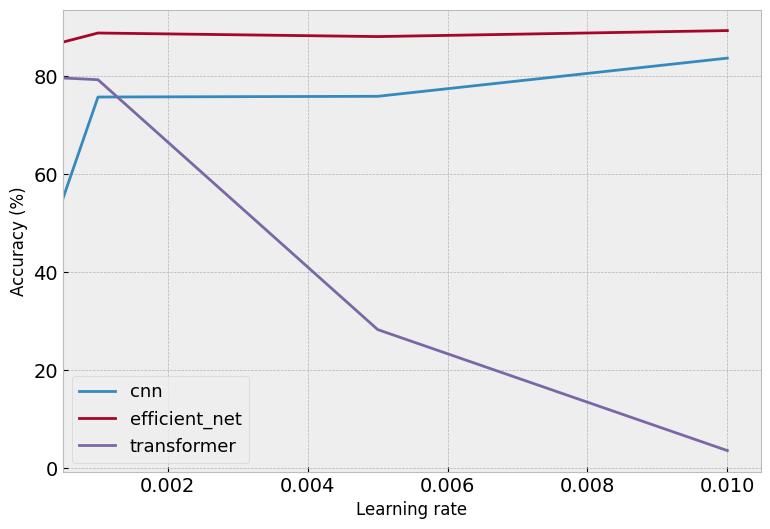

In [24]:
plt.figure(figsize=(9, 6))

for df_name in ['cnn_lr.csv', 'efficient_net_lr.csv', 'transformer_lr.csv']:
    df = pd.read_csv(f'hyper_results/{df_name}')
    plt.plot(df['lr'], df['acc_total'], label=df['model_name'][0])

plt.xlabel("Learning rate")
plt.ylabel("Accuracy (%)")
plt.xlim(left=0.0005)
plt.legend()
plt.savefig('plots/learning_rate.pdf', bbox_inches = 'tight')
plt.show()

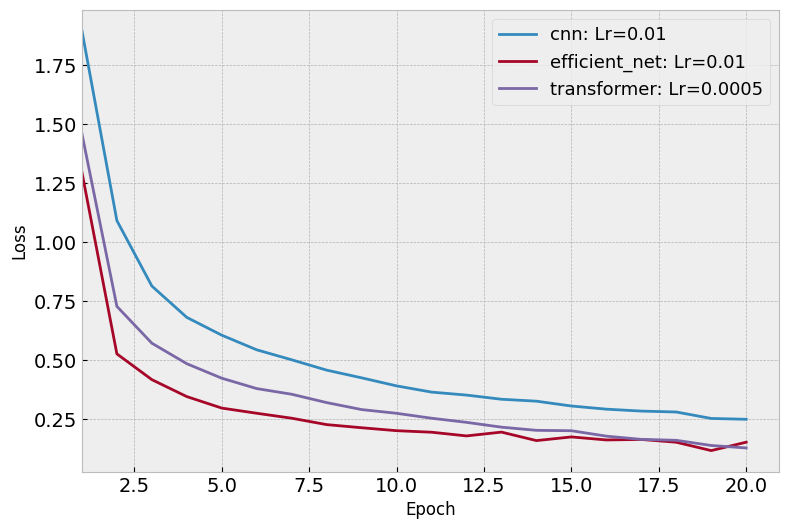

In [25]:
plt.figure(figsize=(9, 6))

model_names = {
    'cnn_0.01_0.csv': ('cnn',0.01),
    'efficient_net_0.01_0.csv': ('efficient_net',0.01),
    'transformer_0.0005_0.csv': ('transformer',0.0005),
}

for df_name, (model_name, lr) in model_names.items():
    df = pd.read_csv(f'loss_results/{df_name}')
    plt.plot(df['Epoch'], df['Loss'], label=model_name + f': Lr={lr}')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(left=1)
plt.legend()
plt.savefig('plots/learning_rate_loss.pdf', bbox_inches = 'tight')
plt.show()

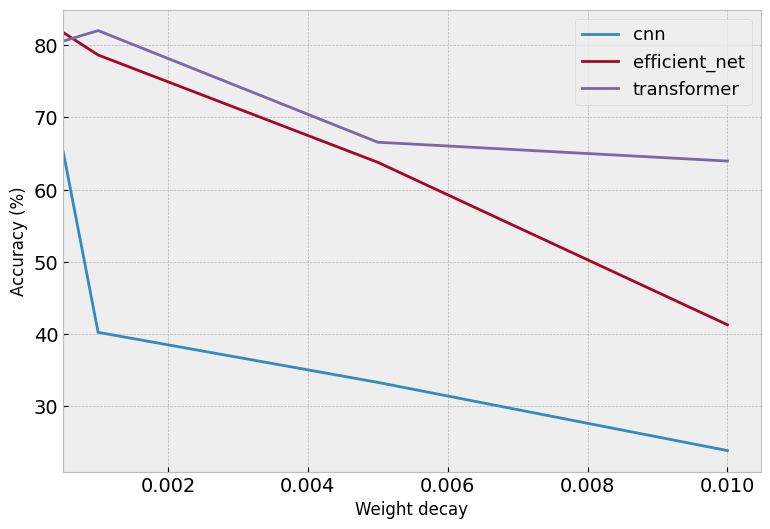

In [26]:
plt.figure(figsize=(9, 6))

for df_name in ['cnn_weight_decay.csv', 'efficient_net_weight_decay.csv', 'transformer_weight_decay.csv']:
    df = pd.read_csv(f'hyper_results/{df_name}')
    plt.plot(df['weight_decay'], df['acc_total'], label=df['model_name'][0])

plt.xlabel("Weight decay")
plt.ylabel("Accuracy (%)")
plt.xlim(left=0.0005)
plt.legend()
plt.savefig('plots/weight_decay.pdf', bbox_inches = 'tight')
plt.show()

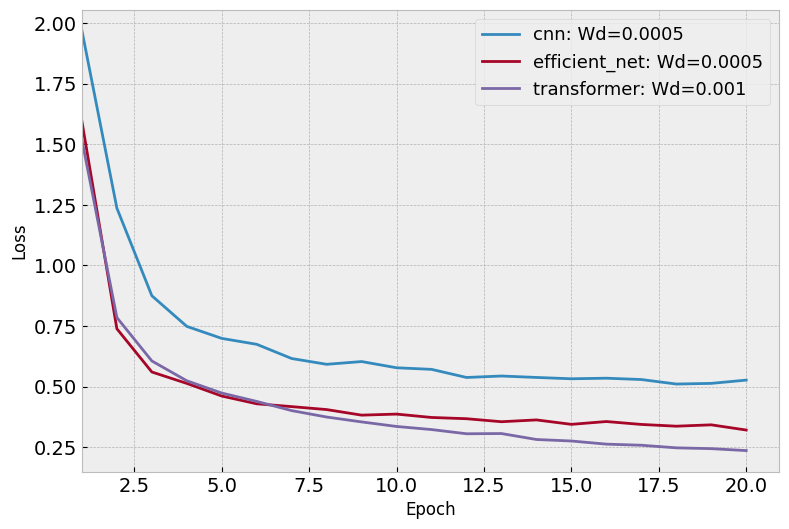

In [27]:
plt.figure(figsize=(9, 6))

model_names = {
    'cnn_0.01_0.0005.csv': ('cnn',0.0005),
    'efficient_net_0.01_0.0005.csv': ('efficient_net',0.0005),
    'transformer_0.0005_0.001.csv': ('transformer',0.001),
}

for df_name, (model_name, lr) in model_names.items():
    df = pd.read_csv(f'loss_results/{df_name}')
    plt.plot(df['Epoch'], df['Loss'], label=model_name + f': Wd={lr}')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xlim(left=1)
plt.legend()
plt.savefig('plots/weight_decay_loss.pdf', bbox_inches = 'tight')
plt.show()

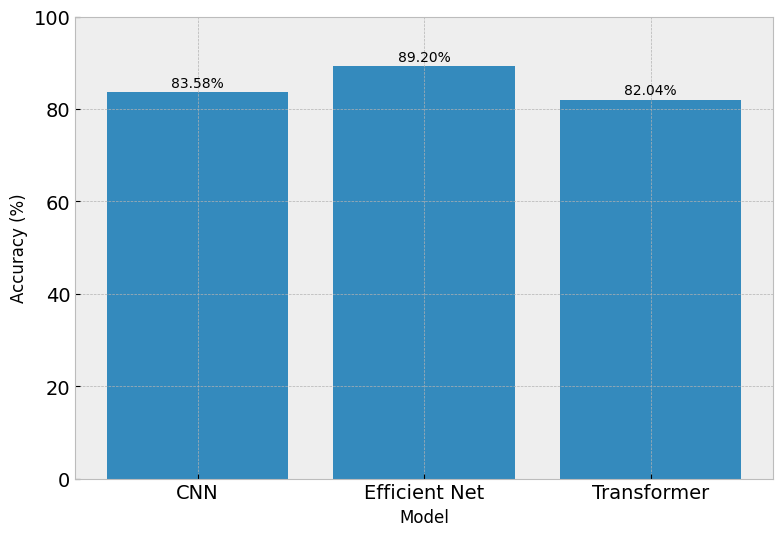

In [28]:
data = {
    'model_name': ['CNN', 'Efficient Net', 'Transformer'],
    'acc_total': [83.58, 89.20, 82.04]
}

df = pd.DataFrame(data)
plt.figure(figsize=(9, 6))

x_positions = range(len(df['model_name']))
acc_values = df['acc_total']

bars = plt.bar(
    x_positions,
    acc_values,
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f'{height:.2f}%',
        ha='center',
        va='bottom'
    )

plt.xticks(x_positions, df['model_name'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)

plt.savefig('plots/summary_bar.pdf', bbox_inches='tight')
plt.show()